In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [32]:
def clean_text(text: str) -> str:
    # 2) remove any occurrences of "x92"
    text = re.sub(r'\x92', "'", text)
    # 1) replace any punctuation (i.e. non-word, non-space) with a space
    text = re.sub(r'[^\w\s]', '', text)
    # 3) lowercase everything
    text = text.lower()
    # 4) collapse multiple whitespace into one, and strip ends
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [33]:
datapath = '/Users/sidsatya/dev/ailabor/task_classification/data/classified_tasks_felten.csv'
data = pd.read_csv(datapath)
data['task_clean'] = data['Task'].apply(clean_text)
data

,Task,gpt_label,sample_num,task_clean
0,Resolve customer complaints regarding sales an...,"{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",2,resolve customer complaints regarding sales an...
1,Resolve customer complaints regarding sales an...,"{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",1,resolve customer complaints regarding sales an...
2,Resolve customer complaints regarding sales an...,"{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",0,resolve customer complaints regarding sales an...
3,Monitor customer preferences to determine focu...,"{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",0,monitor customer preferences to determine focu...
4,Monitor customer preferences to determine focu...,"{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",1,monitor customer preferences to determine focu...
...,...,...,...,...
78051,"Fit garments on clients, altering as needed.","{1:'No',2:'No',3:'No',4:'No',5:'Yes',6:'No',7:...",0,fit garments on clients altering as needed
78052,"Fit garments on clients, altering as needed.","{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",2,fit garments on clients altering as needed
78053,"Assist passengers, such as elderly or individu...","{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",2,assist passengers such as elderly or individua...
78054,"Assist passengers, such as elderly or individu...","{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",0,assist passengers such as elderly or individua...


In [34]:
def read_gpt_label(label):
    # label is formatted as a JSON string with 10 key-value pairs
    label = label.replace("'", '"')  # Replace single quotes with double quotes
    label = label.replace('nan', 'null')  # Replace 'nan' with 'null' for JSON compatibility
    try:
        label_dict = eval(label)  # Use eval to convert the string to a dictionary
        return label_dict
    except Exception as e:
        if e != 'gpt_label':
            print(f"Error parsing label: {e}")
        return {}


data['read_label'] = data['gpt_label'].apply(read_gpt_label)
data['abstract_strategy_games'] = data['read_label'].apply(lambda x: 1 if x.get(1, 'No') == 'Yes' else 0)
data['real_time_video_games'] = data['read_label'].apply(lambda x: 1 if x.get(2, 'No') == 'Yes' else 0)
data['image_recognition'] = data['read_label'].apply(lambda x: 1 if x.get(3, 'No') == 'Yes' else 0)
data['visual_qa'] = data['read_label'].apply(lambda x: 1 if x.get(4, 'No') == 'Yes' else 0)
data['image_generation'] = data['read_label'].apply(lambda x: 1 if x.get(5, 'No') == 'Yes' else 0)
data['reading_comprehension'] = data['read_label'].apply(lambda x: 1 if x.get(6, 'No') == 'Yes' else 0)
data['language_modeling'] = data['read_label'].apply(lambda x: 1 if x.get(7, 'No') == 'Yes' else 0)
data['translation'] = data['read_label'].apply(lambda x: 1 if x.get(8, 'No') == 'Yes' else 0)
data['speech_recognition'] = data['read_label'].apply(lambda x: 1 if x.get(9, 'No') == 'Yes' else 0)
data['instrumental_track_recognition'] = data['read_label'].apply(lambda x: 1 if x.get(10, 'No') == 'Yes' else 0)

Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined


In [35]:
# Group by Task and compute mode and mean for each category
grouped_data = data.groupby('task_clean').agg({
    'abstract_strategy_games': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'real_time_video_games': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'image_recognition': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'visual_qa': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'image_generation': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'reading_comprehension': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'language_modeling': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'translation': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'speech_recognition': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'instrumental_track_recognition': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0]
}).reset_index()

# collapse the multi-level columns into dimension_mean and dimension_mode
grouped_data.columns = ['Task', 'abstract_strategy_games_mean', 'abstract_strategy_games_mode',
                        'real_time_video_games_mean', 'real_time_video_games_mode',
                        'image_recognition_mean', 'image_recognition_mode',
                        'visual_qa_mean', 'visual_qa_mode',
                        'image_generation_mean', 'image_generation_mode',
                        'reading_comprehension_mean', 'reading_comprehension_mode',
                        'language_modeling_mean', 'language_modeling_mode',
                        'translation_mean', 'translation_mode',
                        'speech_recognition_mean', 'speech_recognition_mode',
                        'instrumental_track_recognition_mean', 'instrumental_track_recognition_mode']

print(grouped_data.shape)
grouped_data

(22273, 21)


,Task,abstract_strategy_games_mean,abstract_strategy_games_mode,real_time_video_games_mean,real_time_video_games_mode,image_recognition_mean,image_recognition_mode,visual_qa_mean,visual_qa_mode,image_generation_mean,...,reading_comprehension_mean,reading_comprehension_mode,language_modeling_mean,language_modeling_mode,translation_mean,translation_mode,speech_recognition_mean,speech_recognition_mode,instrumental_track_recognition_mean,instrumental_track_recognition_mode
0,accept and check containers of mail or parcels...,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
1,accept and implement energy schedules includin...,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,...,1.0,1,1.0,1,1.0,1,0.0,0,0.0,0
2,accept commissions to create music for special...,0.0,0,0.0,0,0.000000,0,0.0,0,1.0,...,0.0,0,0.0,0,0.0,0,0.0,0,1.0,1
3,accept orders from customers calculate and quo...,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,...,1.0,1,1.0,1,1.0,1,0.0,0,0.0,0
4,accept payment from customers and make change ...,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22268,writes reports on sales and products,0.0,0,0.0,0,0.333333,0,0.0,0,0.0,...,1.0,1,1.0,1,1.0,1,0.0,0,0.0,0
22269,writes specifications on tracing paper to prov...,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,...,1.0,1,1.0,1,1.0,1,0.0,0,0.0,0
22270,writes specifications to order custommade surg...,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,...,1.0,1,1.0,1,0.0,0,0.0,0,0.0,0
22271,writes words to fit musical compositions inclu...,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,...,1.0,1,1.0,1,1.0,1,0.0,0,0.0,0


In [36]:
# Find all rows where the mean of any dimension_mean column is not equal to the mode of the corresponding dimension_mode column
filtered_tasks = grouped_data[(grouped_data['abstract_strategy_games_mean'] != grouped_data['abstract_strategy_games_mode']) | 
                                (grouped_data['real_time_video_games_mean'] != grouped_data['real_time_video_games_mode']) |
                                (grouped_data['image_recognition_mean'] != grouped_data['image_recognition_mode']) |
                                (grouped_data['visual_qa_mean'] != grouped_data['visual_qa_mode']) |
                                (grouped_data['image_generation_mean'] != grouped_data['image_generation_mode']) |
                                (grouped_data['reading_comprehension_mean'] != grouped_data['reading_comprehension_mode']) |
                                (grouped_data['language_modeling_mean'] != grouped_data['language_modeling_mode']) |
                                (grouped_data['translation_mean'] != grouped_data['translation_mode']) |
                                (grouped_data['speech_recognition_mean'] != grouped_data['speech_recognition_mode']) |
                                (grouped_data['instrumental_track_recognition_mean'] != grouped_data['instrumental_track_recognition_mode'])]
filtered_tasks.shape

(6815, 21)

In [37]:
print(f"GPT agreed across multiple (>= 3) samples unanimously on all but {7023/23839:.2%} of tasks".format(len(filtered_tasks), len(data)))

GPT agreed across multiple (>= 3) samples unanimously on all but 29.46% of tasks


In [148]:
# Load in the AI progress metrics 
ai_progress_dir = '/Users/sidsatya/dev/ailabor/ai_progress_metrics/data'
year_dim_avg_slopes = pd.read_csv(f'{ai_progress_dir}/year_dim_avg_slopes.csv')
year_dim_avg_slopes = year_dim_avg_slopes.rename(columns={'Unnamed: 0': 'year'})
overall_slopes = pd.read_csv(f'{ai_progress_dir}/overall_slopes.csv')

In [149]:
overall_slopes_T = overall_slopes.T.reset_index().drop(columns=['index'])
overall_slopes_T.columns = [x + " Overall Slope" for x in overall_slopes_T.iloc[0]]
overall_slopes_T = overall_slopes_T[1:]

year_dim_avg_slopes.set_index('year', inplace=True)
year_dim_avg_slopes.columns = [x + " Year Slope" for x in year_dim_avg_slopes.columns]
year_dim_avg_slopes.reset_index(inplace=True)
year_dim_avg_slopes['prog_year'] = pd.to_datetime(year_dim_avg_slopes['year']).dt.year

year_dim_avg_slopes['Image Recognition Cum Slope'] = year_dim_avg_slopes['Image Recognition Year Slope'].cumsum()
year_dim_avg_slopes['Visual QA Cum Slope'] = year_dim_avg_slopes['Visual QA Year Slope'].cumsum()
year_dim_avg_slopes['Image Generation Cum Slope'] = year_dim_avg_slopes['Image Generation Year Slope'].cumsum()
year_dim_avg_slopes['Reading Comprehension Cum Slope'] = year_dim_avg_slopes['Reading Comprehension Year Slope'].cumsum()
year_dim_avg_slopes['Language Modeling Cum Slope'] = year_dim_avg_slopes['Language Modeling Year Slope'].cumsum()
year_dim_avg_slopes['Translation Cum Slope'] = year_dim_avg_slopes['Translation Year Slope'].cumsum()
year_dim_avg_slopes['Speech Recognition Cum Slope'] = year_dim_avg_slopes['Speech Recognition Year Slope'].cumsum()
year_dim_avg_slopes['Instrumental Track Recognition Cum Slope'] = year_dim_avg_slopes['Instrumental Track Recognition Year Slope'].cumsum()
year_dim_avg_slopes['Real-Time Video Games Cum Slope'] = year_dim_avg_slopes['Real-Time Video Games Year Slope'].cumsum()
year_dim_avg_slopes['Abstract Strategy Games Cum Slope'] = year_dim_avg_slopes['Abstract Strategy Games Year Slope'].cumsum()


In [150]:
year_dim_avg_slopes.head()

,year,Image Recognition Year Slope,Speech Recognition Year Slope,Abstract Strategy Games Year Slope,Language Modeling Year Slope,Reading Comprehension Year Slope,Real-Time Video Games Year Slope,Instrumental Track Recognition Year Slope,Image Generation Year Slope,Translation Year Slope,...,Image Recognition Cum Slope,Visual QA Cum Slope,Image Generation Cum Slope,Reading Comprehension Cum Slope,Language Modeling Cum Slope,Translation Cum Slope,Speech Recognition Cum Slope,Instrumental Track Recognition Cum Slope,Real-Time Video Games Cum Slope,Abstract Strategy Games Cum Slope
0,1985-01-01,0.0,0.0,0.113482,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113482
1,1986-01-01,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113482
2,1987-01-01,0.0,0.0,0.051211,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.164693
3,1988-01-01,0.0,0.0,0.035755,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200448
4,1989-01-01,0.0,0.0,0.016916,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217364


In [151]:
# Merge with the overall task dataset 
all_task_datapath = '/Users/sidsatya/dev/ailabor/onet_transformations/output_data/task_statements_harmonized_with_attributes.csv'
all_task_data = pd.read_csv(all_task_datapath)
all_task_data['task_clean'] = all_task_data['Task'].apply(clean_text)

# Merge all_data with grouped data on 'Task'
merged_data = pd.merge(all_task_data, grouped_data, left_on='task_clean', right_on = 'Task', how='left')

# Merge with the year_dim_avg_slopes data on year
merged_data = pd.merge(merged_data, year_dim_avg_slopes, left_on='ONET_release_year', right_on='prog_year', how='left')

# Horizontally stack overall slopes to merged data
# Repeat overall_slopes_T for the number of rows in merged_data
overall_slopes_repeated = pd.concat([overall_slopes_T] * len(merged_data), ignore_index=True)

# Concatenate the repeated overall_slopes_T with merged_data
merged_data = pd.concat([merged_data.reset_index(drop=True), overall_slopes_repeated], axis=1)

In [152]:
# Drop any rows with NaN values in the 'reading_comprehension_mean' column
merged_data = merged_data.dropna(subset=['reading_comprehension_mean'])
print(merged_data.shape, merged_data.columns)

(348166, 80) Index(['O*NET-SOC Code', 'O*NET 2010 SOC Code', 'O*NET 2018 SOC Code',
       'ONET_release_year', 'Task ID', 'Task_x', 'Task Type',
       'Incumbents Responding', 'Date', 'Domain Source', 'Count', 'task_clean',
       'canon_id', 'year_x', 'Mean Importance', 'Importance Normalized All',
       'Mean Frequency', 'normalized_importance', 'normalized_importance_core',
       'normalized_frequency', 'normalized_frequency_core', 'task_intensity',
       'task_intensity_core', 'first_seen', 'last_seen', 'Task_y',
       'abstract_strategy_games_mean', 'abstract_strategy_games_mode',
       'real_time_video_games_mean', 'real_time_video_games_mode',
       'image_recognition_mean', 'image_recognition_mode', 'visual_qa_mean',
       'visual_qa_mode', 'image_generation_mean', 'image_generation_mode',
       'reading_comprehension_mean', 'reading_comprehension_mode',
       'language_modeling_mean', 'language_modeling_mode', 'translation_mean',
       'translation_mode', 'speech_r

In [154]:
merged_data[['O*NET 2018 SOC Code', 'ONET_release_year', 'Image Generation Overall Slope', 'Image Generation Year Slope', 'Image Generation Cum Slope']]

,O*NET 2018 SOC Code,ONET_release_year,Image Generation Overall Slope,Image Generation Year Slope,Image Generation Cum Slope
0,11-1011,2003,0.348742,0.000000,0.00000
1,11-1011,2003,0.348742,0.000000,0.00000
2,11-1011,2003,0.348742,0.000000,0.00000
3,11-1011,2003,0.348742,0.000000,0.00000
4,11-1011,2003,0.348742,0.000000,0.00000
...,...,...,...,...,...
453264,53-7081,2025,0.348742,0.131907,3.21257
453265,53-7081,2025,0.348742,0.131907,3.21257
453266,53-7081,2025,0.348742,0.131907,3.21257
453267,53-7081,2025,0.348742,0.131907,3.21257


In [155]:
# ------------------------------------------------------------------
# §1  Fill missing task-intensity columns (fixes the typo as well)
# ------------------------------------------------------------------
merged_data['task_intensity']      = merged_data['task_intensity'].fillna(0)
merged_data['task_intensity_core'] = merged_data['task_intensity_core'].fillna(0)

# ------------------------------------------------------------------
# §2  Create weighted-exposure columns for each Felten dimension
# ------------------------------------------------------------------
#  dictionary:  task-flag prefix  →  column holding the (overall OR yearly) slope
felten_dims = {
    'abstract_strategy_games'        : 'Abstract Strategy Games Cum Slope',
    'real_time_video_games'          : 'Real-Time Video Games Cum Slope',
    'image_recognition'              : 'Image Recognition Cum Slope',
    'visual_qa'                      : 'Visual QA Cum Slope',
    'image_generation'               : 'Image Generation Cum Slope',
    'reading_comprehension'          : 'Reading Comprehension Cum Slope',
    'language_modeling'              : 'Language Modeling Cum Slope',
    'translation'                    : 'Translation Cum Slope',
    'speech_recognition'             : 'Speech Recognition Cum Slope',
    'instrumental_track_recognition' : 'Instrumental Track Recognition Cum Slope'
}

for dim, slope_col in felten_dims.items():
    # all tasks
    merged_data[f'weighted_{dim}'] = (
        merged_data[f'{dim}_mode'] *
        merged_data['task_intensity'] *
        merged_data[slope_col]
    )
    # core tasks only
    merged_data[f'weighted_{dim}_core'] = (
        merged_data[f'{dim}_mode'] *
        merged_data['task_intensity_core'] *
        merged_data[slope_col]
    )

# ------------------------------------------------------------------
# §3  Collapse to an occupation-by-year exposure panel
# ------------------------------------------------------------------
collapse_cols = [c for c in merged_data.columns if c.startswith('weighted_')]

occ_year = (
    merged_data
    .groupby(['O*NET 2018 SOC Code', 'ONET_release_year'])[collapse_cols]
    .sum()
    .reset_index()
)

# overall exposure indices (all tasks vs. core tasks)
weight_cols_all  = [c for c in collapse_cols if not c.endswith('_core')]
weight_cols_core = [c for c in collapse_cols if c.endswith('_core')]

occ_year['exposure_all']  = occ_year[weight_cols_all ].sum(axis=1)
occ_year['exposure_core'] = occ_year[weight_cols_core].sum(axis=1)

# ------------------------------------------------------------------
# Result: `occ_year` has one row per (occupation, year) with:
#         - exposure_all  : shift–share index using *all* tasks
#         - exposure_core : shift–share index using only “core” tasks
# ------------------------------------------------------------------


Text(0.5, 0, 'Δ exposure (max year − 2010)')

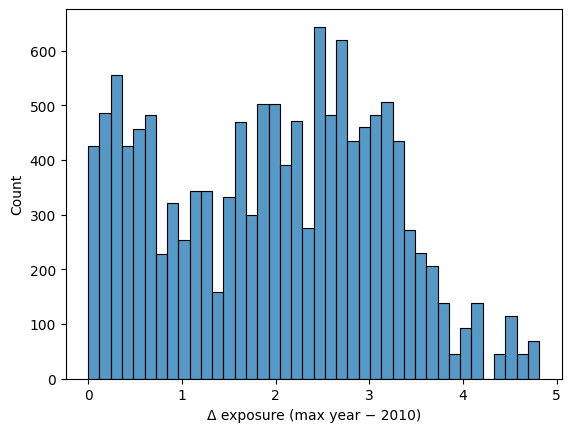

In [156]:
# Compute the maximum exposure for each O*NET 2018 SOC Code
max_exposure = occ_year.groupby('O*NET 2018 SOC Code')['exposure_all'].max()

# Extract the exposure in 2010 for each O*NET 2018 SOC Code
exposure_2010 = occ_year[occ_year['ONET_release_year'] == 2006].set_index('O*NET 2018 SOC Code')['exposure_all']

# Compute the difference between max exposure and exposure in 2010
occ_year['delta'] = occ_year['O*NET 2018 SOC Code'].map(max_exposure) - occ_year['O*NET 2018 SOC Code'].map(exposure_2010)

sns.histplot(occ_year['delta'].dropna(), bins=40)
plt.xlabel('Δ exposure (max year − 2010)')

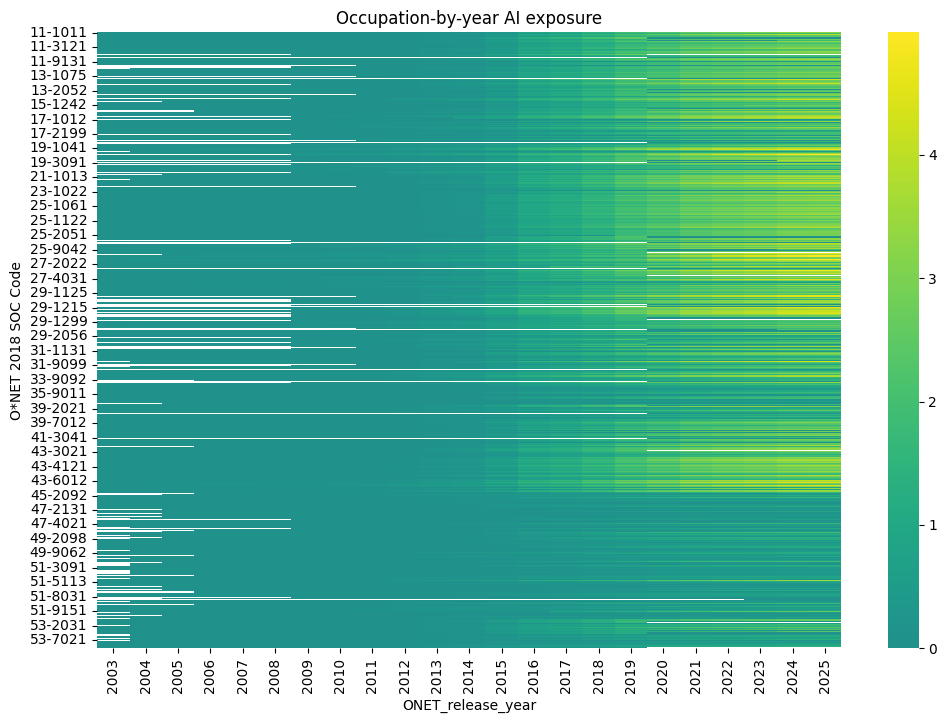

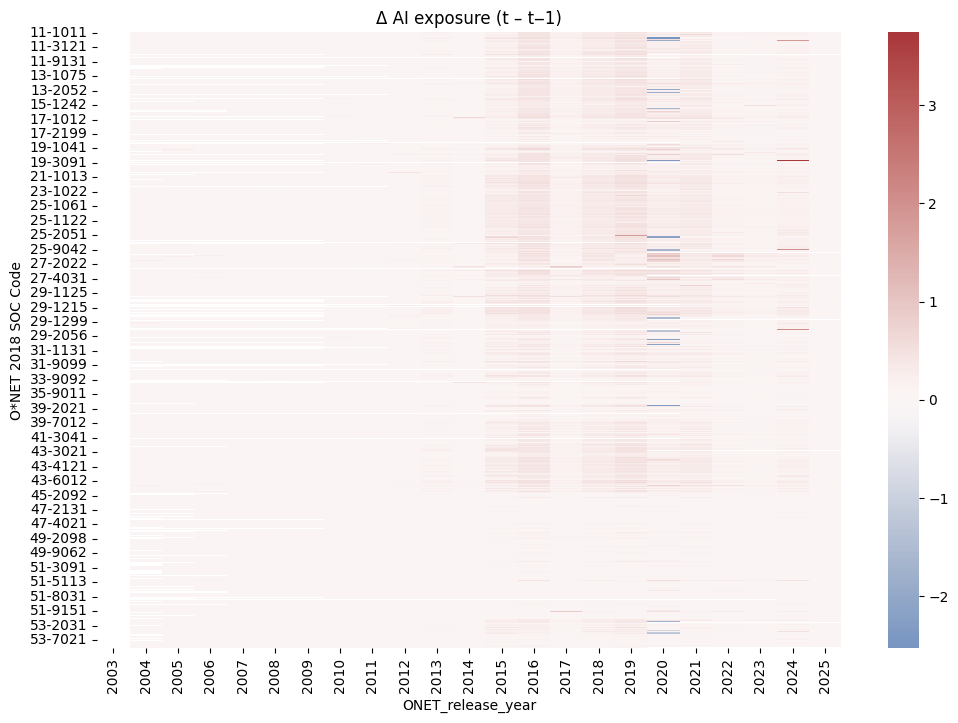

In [157]:
plt.figure(figsize=(12, 8))

pivot = occ_year.pivot(index='O*NET 2018 SOC Code',
                       columns='ONET_release_year',
                       values='exposure_all')

# Ensure the data in the pivot table is numeric
pivot = pivot.apply(pd.to_numeric, errors='coerce')

sns.heatmap(pivot, cmap='viridis', center=0)
plt.title('Occupation-by-year AI exposure')
plt.show()

plt.figure(figsize=(12, 8))
delta = pivot.diff(axis=1)    # difference across columns (years)
sns.heatmap(delta, cmap='vlag', center=0)   # diverging palette
plt.title('Δ AI exposure (t – t‒1)')
plt.show()


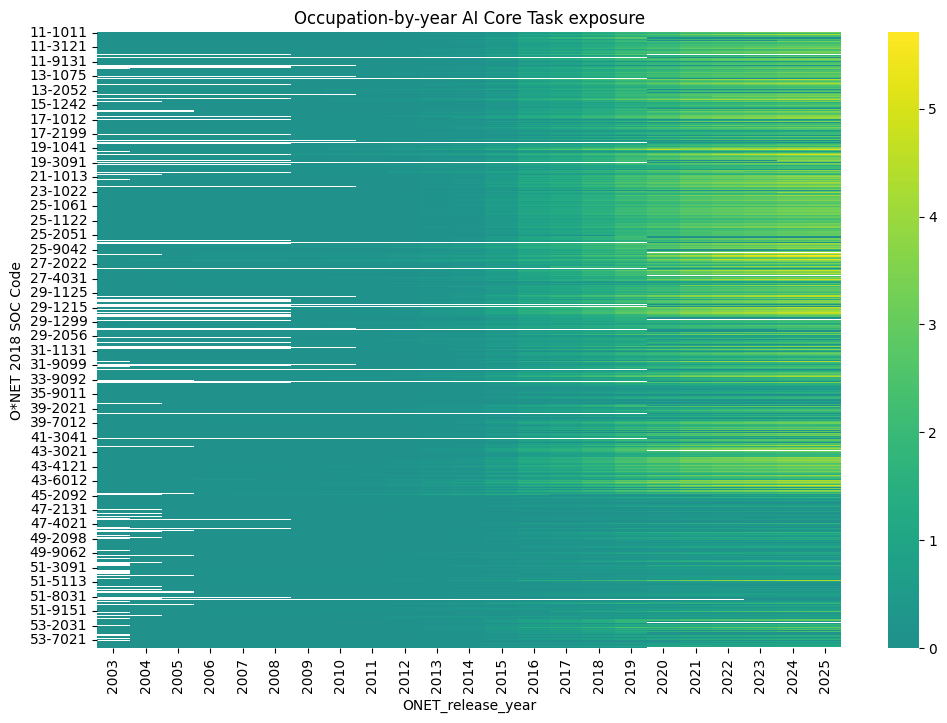

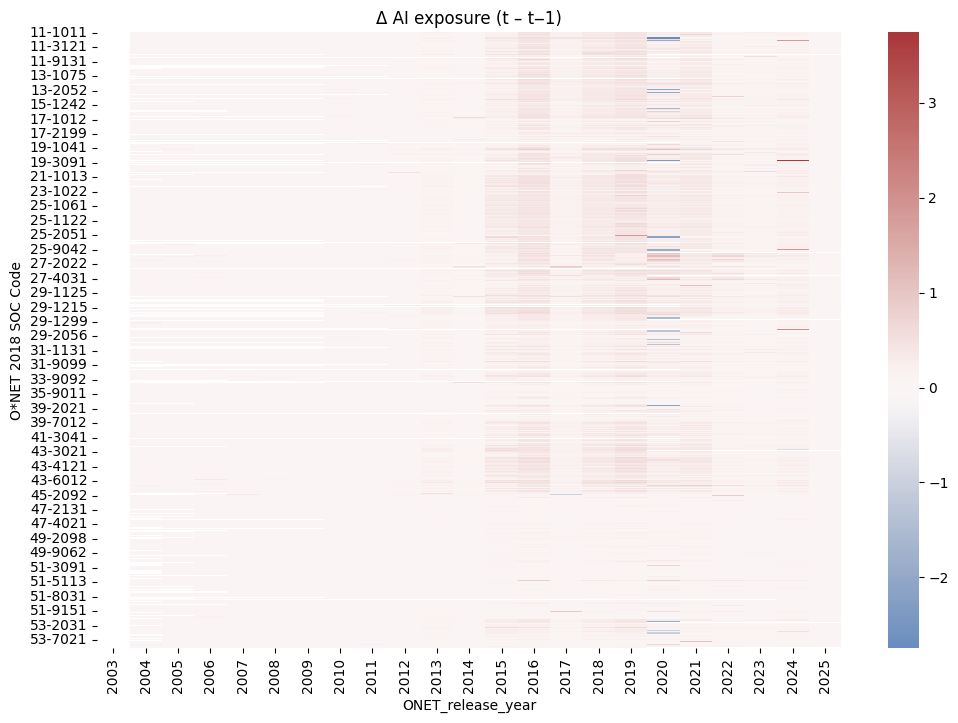

In [158]:
plt.figure(figsize=(12, 8))

pivot = occ_year.pivot(index='O*NET 2018 SOC Code',
                       columns='ONET_release_year',
                       values='exposure_core')

# Ensure the data in the pivot table is numeric
pivot = pivot.apply(pd.to_numeric, errors='coerce')

sns.heatmap(pivot, cmap='viridis', center=0)
plt.title('Occupation-by-year AI Core Task exposure')
plt.show()

plt.figure(figsize=(12, 8))
delta = pivot.diff(axis=1)    # difference across columns (years)
sns.heatmap(delta, cmap='vlag', center=0)   # diverging palette
plt.title('Δ AI exposure (t – t‒1)')
plt.show()


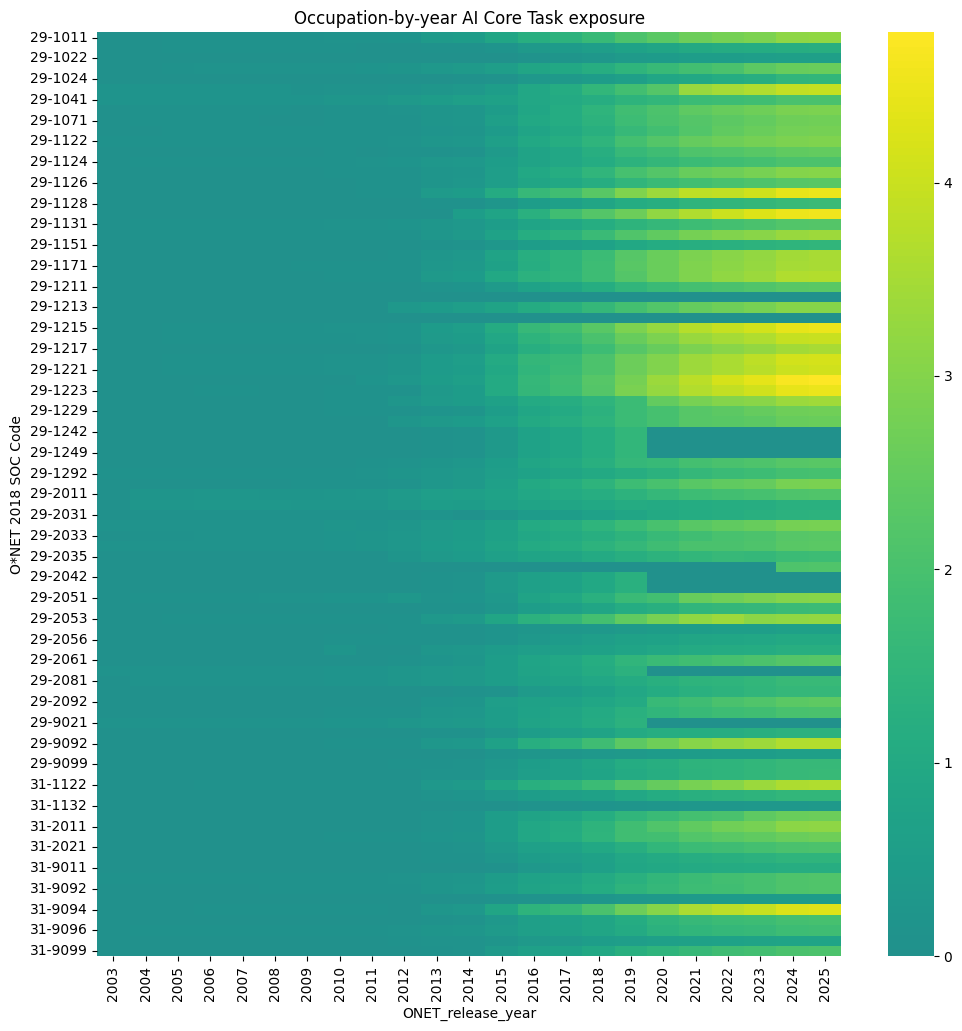

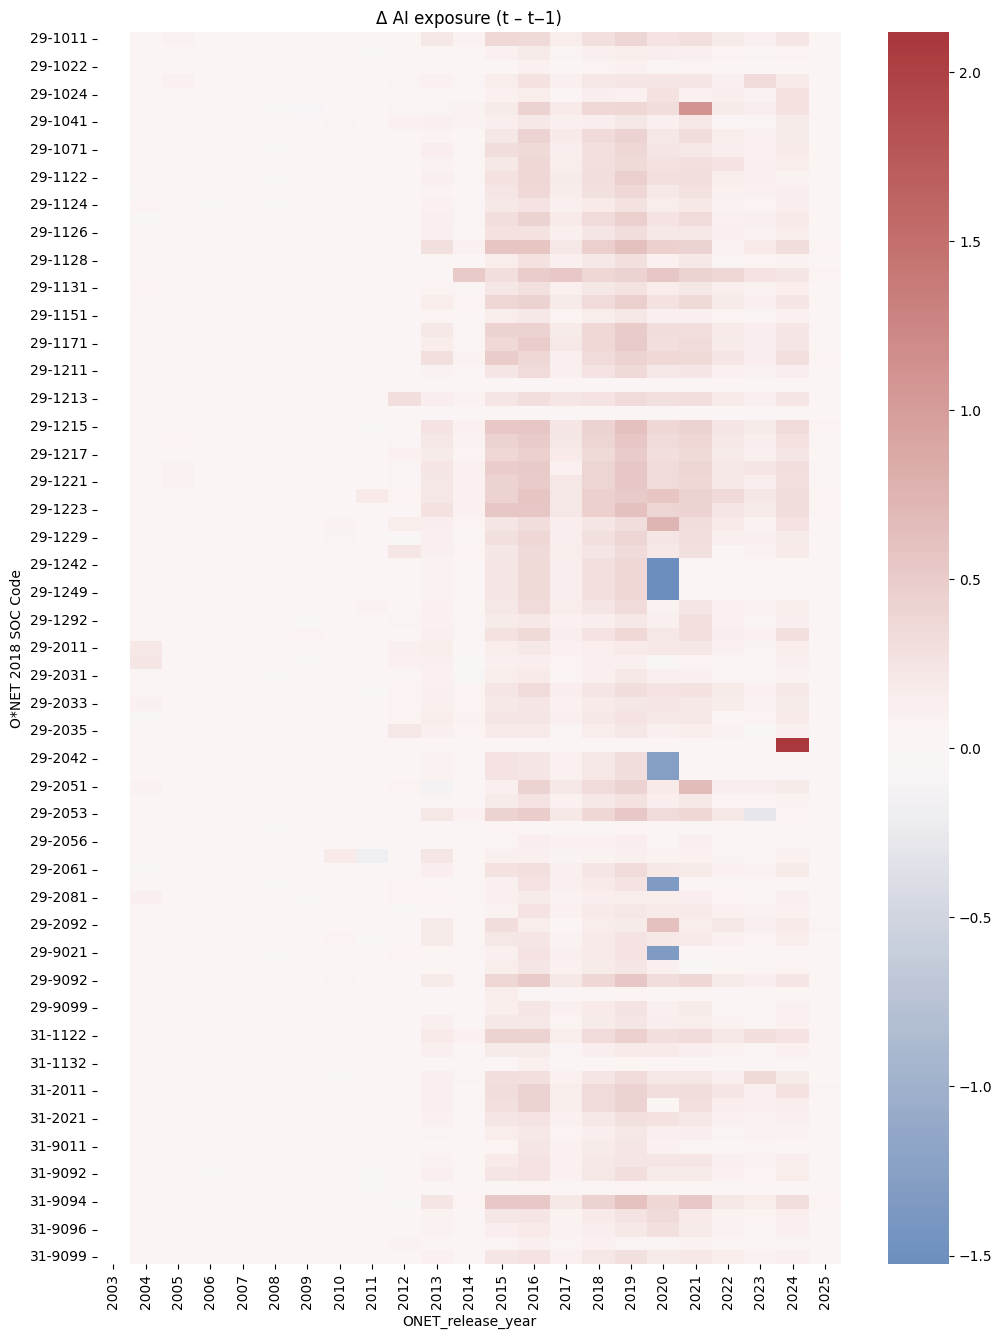

In [170]:
# Include more occupations by expanding the SOC code prefixes
occ_year_healthcare = occ_year[
    (occ_year['O*NET 2018 SOC Code'].str.startswith('31')) | 
    (occ_year['O*NET 2018 SOC Code'].str.startswith('29'))
]

plt.figure(figsize=(12, 12))

pivot = occ_year_healthcare.pivot(index='O*NET 2018 SOC Code',
                                  columns='ONET_release_year',
                                  values='exposure_core')
pivot.fillna(0, inplace=True)  # fill NaN values with 0

# Ensure the data in the pivot table is numeric
pivot = pivot.apply(pd.to_numeric, errors='coerce')
pivot.sort_values(by='O*NET 2018 SOC Code', inplace=True)

sns.heatmap(pivot, cmap='viridis', center=0)
plt.title('Occupation-by-year AI Core Task exposure')
plt.show()

plt.figure(figsize=(12, 16))
delta = pivot.diff(axis=1)  # difference across columns (years)
sns.heatmap(delta, cmap='vlag', center=0)  # diverging palette
plt.title('Δ AI exposure (t – t‒1)')
plt.show()
